In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
TRAIN_PATH = "../input/chest-xray-pneumonia/chest_xray/train"
VAL_PATH = "../input/chest-xray-pneumonia/chest_xray/val"

In [6]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss = keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 54, 54, 64)       

In [12]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [16]:
train_gen = train_datagen.flow_from_directory(
     "../input/covid-dataset/CovidDataset/Train",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
)

Found 224 images belonging to 2 classes.


In [17]:
train_gen.class_indices

{'Covid': 0, 'Normal': 1}

In [21]:
validation_gen = test_dataset.flow_from_directory(
    '../input/covid-dataset/CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
)

Found 60 images belonging to 2 classes.


In [22]:
validation_gen.class_indices

{'Covid': 0, 'Normal': 1}

In [23]:
hist = model.fit_generator(
    train_gen,
    steps_per_epoch = 8,
    validation_data = validation_gen,
    validation_steps = 2,
    epochs = 10
)

Epoch 1/10
8/8 [==============================] - 21s 3s/step - loss: 0.2784 - accuracy: 0.8828 - val_loss: 0.2084 - val_accuracy: 0.9667
Epoch 2/10
8/8 [==============================] - 21s 3s/step - loss: 0.2877 - accuracy: 0.8984 - val_loss: 0.1454 - val_accuracy: 0.9833
Epoch 3/10
8/8 [==============================] - 19s 2s/step - loss: 0.1928 - accuracy: 0.9258 - val_loss: 0.1274 - val_accuracy: 0.9833
Epoch 4/10
8/8 [==============================] - 21s 3s/step - loss: 0.1594 - accuracy: 0.9453 - val_loss: 0.1479 - val_accuracy: 0.9667
Epoch 5/10
8/8 [==============================] - 20s 3s/step - loss: 0.1377 - accuracy: 0.9688 - val_loss: 0.0216 - val_accuracy: 0.9833
Epoch 6/10
8/8 [==============================] - 21s 3s/step - loss: 0.0959 - accuracy: 0.9570 - val_loss: 0.1340 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 20s 3s/step - loss: 0.1127 - accuracy: 0.9570 - val_loss: 0.1963 - val_accuracy: 0.9500
Epoch 8/10
8/8 [==================

In [25]:
model.save("model_adv.h5")

In [26]:
model.evaluate_generator(train_gen)

[0.08884092420339584, 0.9866071343421936]

In [27]:
model.evaluate_generator(validation_gen)

[0.08543799072504044, 0.9666666388511658]

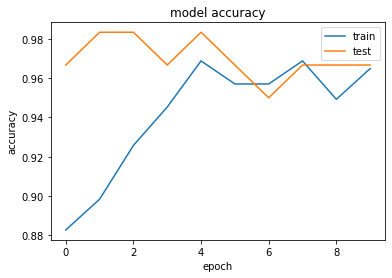

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [29]:
model = load_model('model_adv.h5')

In [30]:
import os

In [31]:
train_gen.class_indices

{'Covid': 0, 'Normal': 1}

In [34]:
y_actual = []
y_test = []

In [35]:
for i in os.listdir('../input/covid-dataset/CovidDataset/Val/Normal'):
  img = image.load_img('../input/covid-dataset/CovidDataset/Val/Normal/'+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [36]:
for i in os.listdir('../input/covid-dataset/CovidDataset/Val/Covid'):
  img = image.load_img('../input/covid-dataset/CovidDataset/Val/Covid/'+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [37]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [38]:
y_actual, y_test

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32))

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
cm = confusion_matrix(y_actual, y_test)

In [41]:
import seaborn as sns

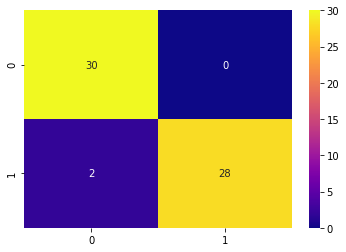

In [42]:
sns.heatmap(cm, cmap="plasma", annot=True)

# Main Comparison

Comparing with IEEE Dataset from https://github.com/ieee8023/covid-chestxray-dataset repo

In [43]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [44]:
train_gen = train_datagen.flow_from_directory(
    '../input/covid-dataset/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    subset='training'
)

Found 224 images belonging to 2 classes.


In [45]:
train_gen.class_indices

{'Covid': 0, 'Normal': 1}

In [50]:
ieee_gen = test_dataset.flow_from_directory(
    '../input/ieeeimagedataset/datasetcovid19/',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
)

Found 364 images belonging to 2 classes.


In [51]:
ieee_gen.class_indices

{'Covid': 0, 'Normal': 1}

In [58]:
hist = model.fit_generator(
    train_gen,
    steps_per_epoch = 6,
    validation_data = ieee_gen,
    validation_steps = 2,
    epochs = 5,
)

Epoch 1/5
6/6 [==============================] - 25s 4s/step - loss: 0.0392 - accuracy: 0.9948 - val_loss: 0.1912 - val_accuracy: 0.9531
Epoch 2/5
6/6 [==============================] - 29s 5s/step - loss: 0.0317 - accuracy: 0.9948 - val_loss: 0.0086 - val_accuracy: 0.9844
Epoch 3/5
6/6 [==============================] - 13s 2s/step - loss: 0.0762 - accuracy: 0.9688 - val_loss: 0.0040 - val_accuracy: 0.9844
Epoch 4/5
6/6 [==============================] - 37s 6s/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0350 - val_accuracy: 0.9531
Epoch 5/5
6/6 [==============================] - 21s 3s/step - loss: 0.0502 - accuracy: 0.9844 - val_loss: 0.0575 - val_accuracy: 0.9531


In [59]:
model.save("model_adv.h5")

In [60]:
model.evaluate_generator(train_gen)

[0.00458112545311451, 0.9821428656578064]

In [61]:
model.evaluate_generator(ieee_gen)

[0.02208774723112583, 0.9752747416496277]

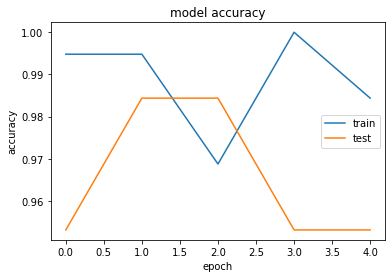

In [63]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [64]:
model = load_model('model_adv.h5')

In [65]:
import os

In [66]:
train_gen.class_indices

{'Covid': 0, 'Normal': 1}

In [67]:
y_actual = []
y_test = []

In [69]:
for i in os.listdir('../input/ieeeimagedataset/datasetcovid19/Normal'):
  img = image.load_img('../input/ieeeimagedataset/datasetcovid19/Normal/'+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [71]:
for i in os.listdir('../input/ieeeimagedataset/datasetcovid19/Covid'):
  img = image.load_img('../input/ieeeimagedataset/datasetcovid19/Covid/'+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [72]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [73]:
y_actual, y_test

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
cm = confusion_matrix(y_actual, y_test)

In [76]:
import seaborn as sns

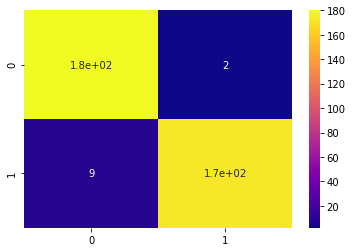

In [77]:
sns.heatmap(cm, cmap="plasma", annot=True)